In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install --upgrade albumentations
# !git clone https://github.com/frgfm/torch-cam.git
# !pip install -e torch-cam/.

In [4]:
! rm -rf ./Weights_Heist_Flow/

In [5]:
! git clone https://github.com/eva7wandb/Weights_Heist_Flow.git

Cloning into 'Weights_Heist_Flow'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 164 (delta 68), reused 73 (delta 21), pack-reused 0
Receiving objects: 100% (164/164), 414.63 KiB | 0 bytes/s, done.
Resolving deltas: 100% (68/68), done.
Checking connectivity... done.


In [6]:
# %cd /content/Weights_Heist_Flow
# ! pwd

In [7]:
import sys
sys.path.append('./Weights_Heist_Flow/')

In [8]:
from main import Trainer, show_misclassification, show_loss_curves
from models import custom_resnet, resnet #, cus_resnet

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


[INFO] Loading Data
Files already downloaded and verified
[INFO] train dataset of size 50000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            XBlock-6          [-1, 128, 16, 16]               0
            Conv2d-7          [-1, 128, 16, 16]         147,456
       BatchNorm2d-8          [-1, 128, 16, 16]             256
            Conv2d-9          [-1, 128, 16, 16]         147,456
      B

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.05E-04


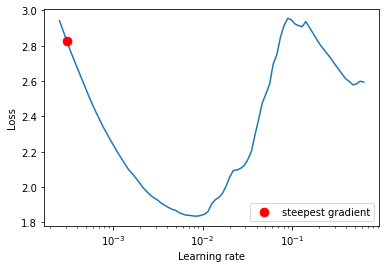

few steps before and after best_loss
(relative step, lr, loss)
(-5, 0.00546, 1.85558)
(-4, 0.00599, 1.84806)
(-3, 0.00658, 1.84127)
(-2, 0.00722, 1.84025)
(-1, 0.00792, 1.83662)
(0, 0.0087, 1.83605)
(1, 0.00955, 1.83964)
(2, 0.01048, 1.84661)
(3, 0.0115, 1.86144)
(4, 0.01262, 1.90428)
----------------------------------------------------------------
TEST         Loss:2.3030         Acc:10.01         [1001 / 10000]


In [29]:
## running to get the appropriate lr
trainer = Trainer(
    custom_resnet.CustomResNet(), lr=0.0001, batch_size=512, 
    scheduler='OneCycleLR', label_smoothing=0.05,
    optimizer='Adam', run_find_lr=True
)

In [66]:
trainer = Trainer(
    custom_resnet.CustomResNet(), lr=0.00673, batch_size=512, 
    scheduler='OneCycleLR', label_smoothing=0.05,
    optimizer='Adam', run_find_lr=False
)
trainer.optimizer.param_groups[0]['weight_decay'] = 0.00001

[INFO] Loading Data
Files already downloaded and verified
[INFO] train dataset of size 50000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded... (v4.1)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            XBlock-6          [-1, 128, 16, 16]               0
            Conv2d-7          [-1, 128, 16, 16]         147,456
       BatchNorm2d-8          [-1, 128, 16, 16]             256
            Conv2d-9          [-1, 128, 16, 16]         147,456
      B

In [67]:
trainer.train_model(epochs=24)

[INFO] Begin training for 24 epochs.


TRAIN Epoch:0 Loss:1.1918 Batch:97 Acc:49.28: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]


TEST         Loss:1.3077         Acc:60.11         [6011 / 10000]


TRAIN Epoch:1 Loss:1.027 Batch:97 Acc:67.80: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s] 


TEST         Loss:1.1525         Acc:67.35         [6735 / 10000]


TRAIN Epoch:2 Loss:0.8958 Batch:97 Acc:75.25: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


TEST         Loss:0.9657         Acc:75.00         [7500 / 10000]


TRAIN Epoch:3 Loss:0.8899 Batch:97 Acc:78.86: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]


TEST         Loss:0.8641         Acc:79.01         [7901 / 10000]


TRAIN Epoch:4 Loss:0.8544 Batch:97 Acc:80.52: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


TEST         Loss:0.8460         Acc:79.48         [7948 / 10000]


TRAIN Epoch:5 Loss:0.7655 Batch:97 Acc:83.67: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s]


TEST         Loss:0.7945         Acc:81.59         [8159 / 10000]


TRAIN Epoch:6 Loss:0.71 Batch:97 Acc:86.06: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]  


TEST         Loss:0.7110         Acc:84.50         [8450 / 10000]


TRAIN Epoch:7 Loss:0.6771 Batch:97 Acc:87.69: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]


TEST         Loss:0.7014         Acc:85.43         [8543 / 10000]


TRAIN Epoch:8 Loss:0.5373 Batch:97 Acc:88.88: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]


TEST         Loss:0.6130         Acc:88.41         [8841 / 10000]


TRAIN Epoch:9 Loss:0.5551 Batch:97 Acc:90.57: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]


TEST         Loss:0.6067         Acc:88.58         [8858 / 10000]


TRAIN Epoch:10 Loss:0.5537 Batch:97 Acc:91.52: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]


TEST         Loss:0.6033         Acc:89.02         [8902 / 10000]


TRAIN Epoch:11 Loss:0.5539 Batch:97 Acc:92.14: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]


TEST         Loss:0.5590         Acc:90.21         [9021 / 10000]


TRAIN Epoch:12 Loss:0.5273 Batch:97 Acc:93.06: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]


TEST         Loss:0.5799         Acc:89.11         [8911 / 10000]


TRAIN Epoch:13 Loss:0.5053 Batch:97 Acc:94.03: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]


TEST         Loss:0.6791         Acc:85.98         [8598 / 10000]


TRAIN Epoch:14 Loss:0.4878 Batch:97 Acc:94.57: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]


TEST         Loss:0.5876         Acc:89.50         [8950 / 10000]


TRAIN Epoch:15 Loss:0.4486 Batch:97 Acc:94.98: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]


TEST         Loss:0.5354         Acc:91.06         [9106 / 10000]


TRAIN Epoch:16 Loss:0.3981 Batch:97 Acc:95.70: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]


TEST         Loss:0.5262         Acc:91.54         [9154 / 10000]


TRAIN Epoch:17 Loss:0.4019 Batch:97 Acc:96.24: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]


TEST         Loss:0.5128         Acc:92.12         [9212 / 10000]


TRAIN Epoch:18 Loss:0.4336 Batch:97 Acc:96.85: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]


TEST         Loss:0.5073         Acc:92.16         [9216 / 10000]


TRAIN Epoch:19 Loss:0.3852 Batch:97 Acc:97.22: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]


TEST         Loss:0.5067         Acc:92.19         [9219 / 10000]


TRAIN Epoch:20 Loss:0.3764 Batch:97 Acc:97.62: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]


TEST         Loss:0.4821         Acc:92.82         [9282 / 10000]


TRAIN Epoch:21 Loss:0.3584 Batch:97 Acc:97.96: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]


TEST         Loss:0.4847         Acc:93.02         [9302 / 10000]


TRAIN Epoch:22 Loss:0.3578 Batch:97 Acc:98.35: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]


TEST         Loss:0.4746         Acc:93.16         [9316 / 10000]


TRAIN Epoch:23 Loss:0.3549 Batch:97 Acc:98.63: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


TEST         Loss:0.4679         Acc:93.53         [9353 / 10000]


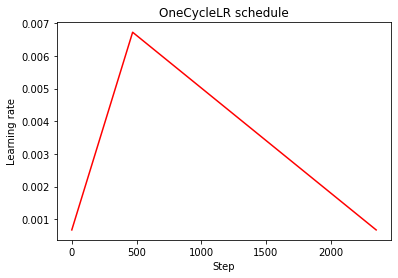

In [68]:
import matplotlib.pyplot as plt

plt.title('OneCycleLR schedule')
plt.ylabel('Learning rate')
plt.xlabel('Step')
plt.plot(trainer.lr_logs, c='red')
plt.show()

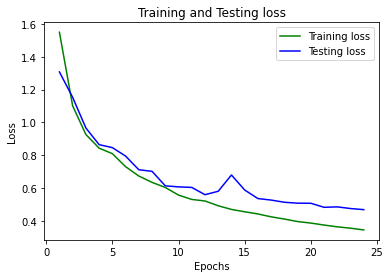

In [69]:
show_loss_curves(trainer.logs)